In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

from ann_utils import *

In [2]:
preproc_folder = "enriched_time"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
output_path = "../data/models/"

prefix = 'time_2018-02-20_p180_bg_'
postfix = '_190721_170'
trainfile = '_traindata'
testfile = '_testdata'


In [3]:
#settings for mlp architecture
#input_shape = len(feature_labels)
#hidden_layers_no=2 
#hidden_nodes=[20,5] 
#hl_activations=[tf.nn.relu]*2 
#optimizer=Adam()
#loss_func='binary_crossentropy'
#metrics=['accuracy',tf.keras.metrics.AUC(),
#                                 tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
#dropout = [0.5]*2

#mlp = create_mlp_model(input_shape=input_shape, 
#                       hidden_layers=hidden_layers,
#                       hidden_nodes=hidden_nodes, 
#                       hl_activations=hl_activations,                                        
#                       optimizer = optimizer,
#                       loss_func=loss_func,
#                      #kernel_regularizers = [l2(0.001)]*3,
#                       dropout = dropout,
#                      metrics = metrics)

#settings for fitting the model
#to_monitor = 'auc'+mlp.name.split('sequential')[-1]
#DISABLED early_stopping = TerminateOnBaseline(monitor=to_monitor #keep track of the model name adding the postfix to the metric to monitor
#                                     , baseline=0.93)
#batch_size = 256
#epochs=150
#class_1_weight = 10

#creating validation data
#validation_size = 20000

#Shuffle set to true

In [4]:
# mlp_exp(datafolder, prefix, postfix, 
#            trainfile='_traindata', testfile='_testdata',
#               hidden_layers_no=1,
#               hidden_nodes=[5],
#               hl_activations=[tf.nn.relu],
#               optimizer=Adam(),
#               loss_func=tf.keras.losses.BinaryCrossentropy(),
#               kernel_initializer = tf.keras.initializers.lecun_uniform(seed=42),
#               bias_initializer = tf.keras.initializers.Zeros(),
#               metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
#               dropout=[0.45],
#               to_monitor=('accuracy', 0.9),
#               early_stopping=False,
#               batch_size=512,
#               epochs=5,
#               class_1_weight=50,
#               validation_size=10000,
#               pred_threshold = 0.55,
#               kernel_regularizers=[],
#               shuffle=False,
#               use_batch_and_steps=False,
#               save_model=False,
#               plot_diagnostics = True,
#               models_path='../data/models/', mlf_tracking=False, experiment_name='experiment',
#               save_results_for_viz=False, viz_output_path='../data/viz_data/')

-Loading preprocessed data...
training files: ../data/preproc_traintest/enriched_time/time_2018-02-20_p180_bg__traindata_190721_170.pkl
testing files: ../data/preproc_traintest/enriched_time/time_2018-02-20_p180_bg__testdata_190721_170.pkl
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                3240      
_________________________________________________________________
dropout (Dropout)            (None, 90)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 45)                4095      
_________________________________________________________________
dropout_1 (Dropout)          (None, 45)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                920       
______________

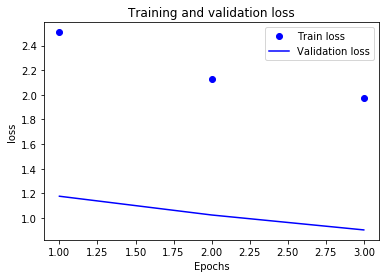

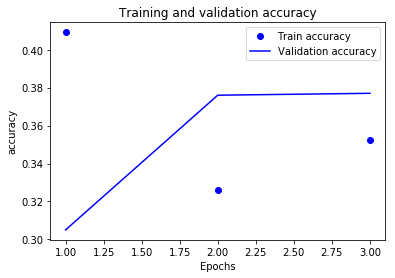

KeyError: 'auc'

In [5]:
experiment = mlp_exp(datafolder, prefix, postfix, experiment_name='test_mlp', 
                     hidden_layers_no=3, hidden_nodes=[90,45,20],
                     optimizer=Adam(0.001),
                     hl_activations=[tf.nn.relu, tf.nn.tanh, tf.nn.relu], dropout=[0.6, 0.5, 0.4], 
                     loss_func = tf.keras.losses.BinaryCrossentropy(),
                     validation_size=1000,
                     metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
                     to_monitor=('accuracy', 0.9),
                     epochs=3, 
                     batch_size=64, 
                     class_1_weight=50,
                     pred_threshold = 0.55,
                     early_stopping=True, 
                     save_model=True, 
                     save_results_for_viz=True,
                     mlf_tracking=True)